# Goal

We're prototyping `source_maps.py` to get some useful outputs.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.table

In [3]:
%run ../source_maps.py



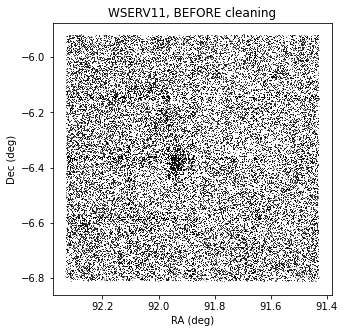

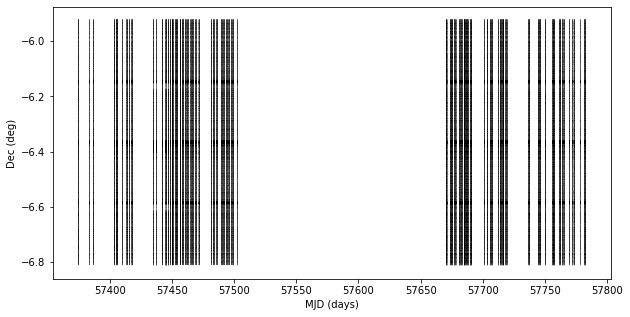

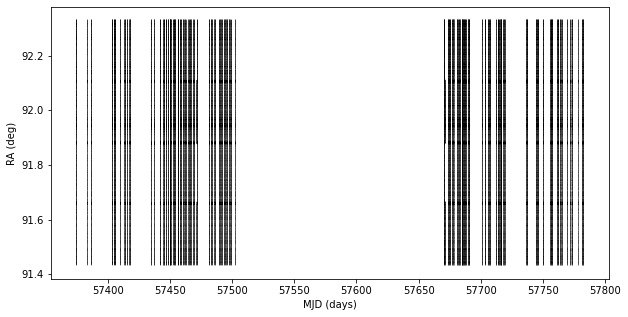

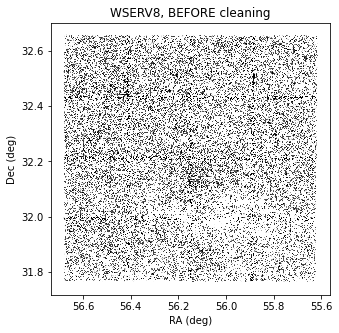

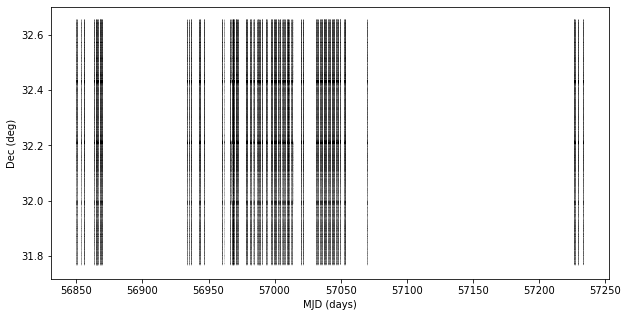

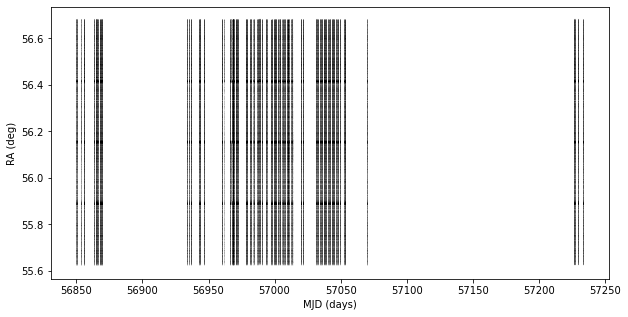

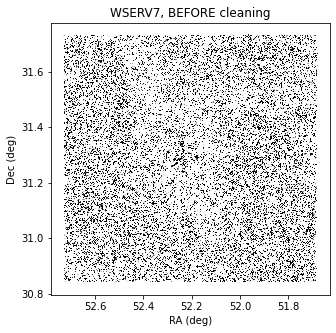

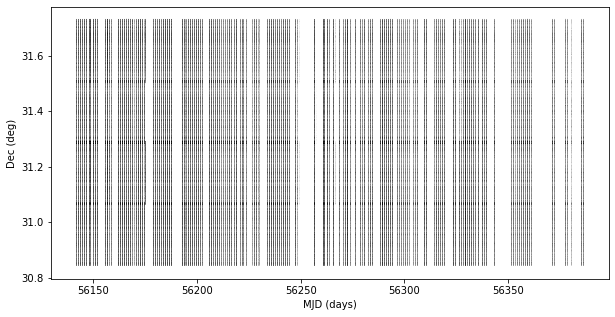

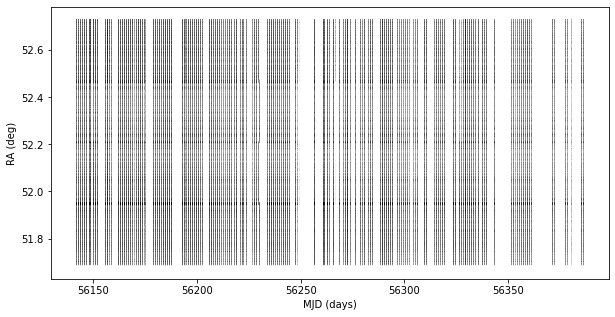

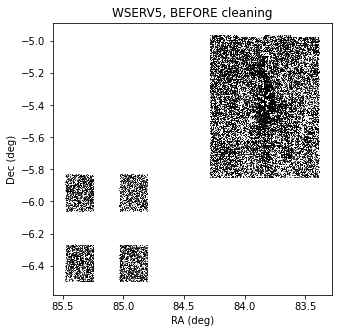

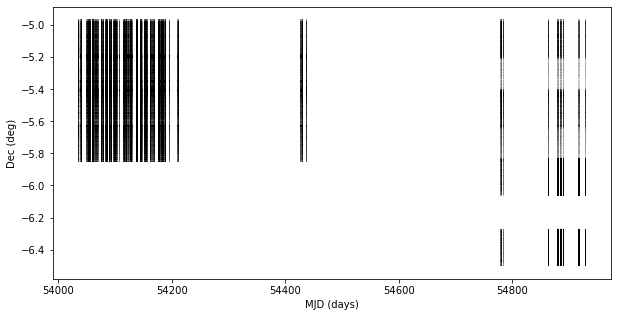

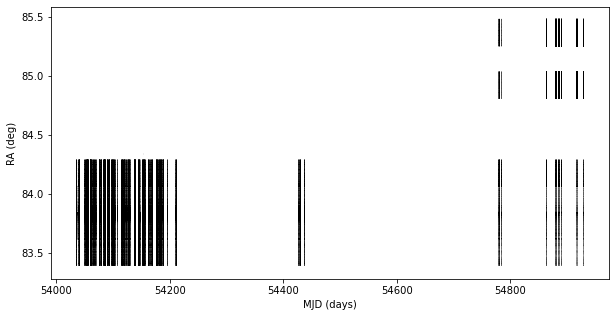

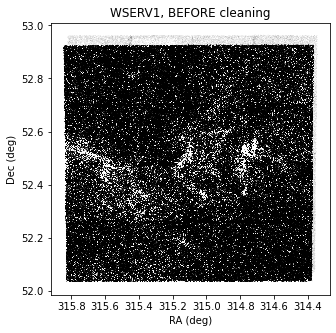

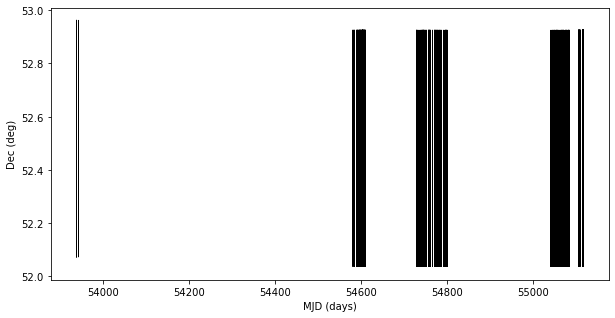

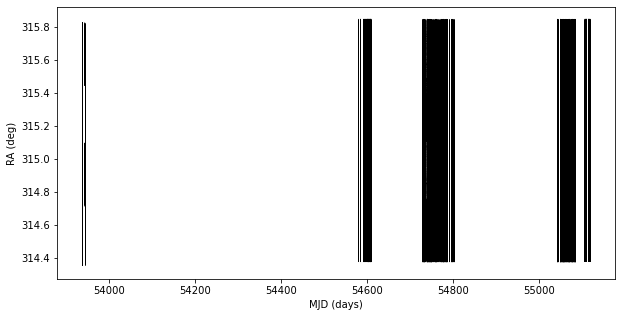

In [22]:
wserv_ids = [1, 5, 7, 8, 11]
raw_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads"
for wserv in wserv_ids[::-1]:
    raw_path = os.path.join(raw_root, f"WSERV{str(wserv)}.fits.gz",)
    raw_dat = astropy.table.Table.read(raw_path)
    
    plt.figure(figsize=(5,5))
    
    plt.plot(np.degrees(raw_dat['RA']), np.degrees(raw_dat['DEC']), 'k,', alpha=0.01)
    plt.gca().invert_xaxis()
    plt.title(f"WSERV{str(wserv)}, BEFORE cleaning")
    plt.xlabel("RA (deg)")
    plt.ylabel("Dec (deg)")
    
    plt.figure(figsize=(10,5))
    plt.plot(raw_dat['MEANMJDOBS'], np.degrees(raw_dat['DEC']), 'k,', alpha=0.01)
    plt.xlabel("MJD (days)")
    plt.ylabel("Dec (deg)")

    plt.figure(figsize=(10,5))
    plt.plot(raw_dat['MEANMJDOBS'], np.degrees(raw_dat['RA']), 'k,', alpha=0.01)
    plt.xlabel("MJD (days)")
    plt.ylabel("RA (deg)")



# Now with the cleaned data. (Note: ignore for now.)

This is a little premature, because we know we need to re-clean wserv5, but I'm curious what this reveals. (if anything!)

Ok, this is a bad metric, because cleaning just replaces magnitudes with nans, so all the RA datapoints are still here. **This isn't quite what we want.**


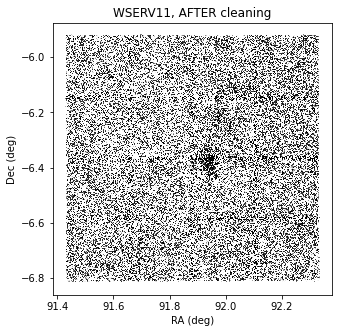

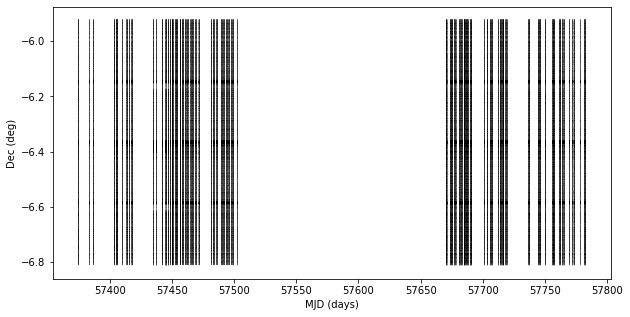

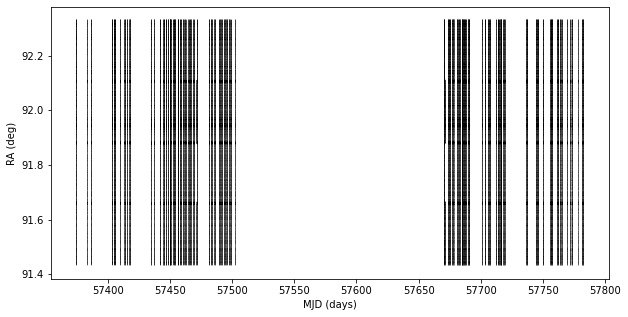

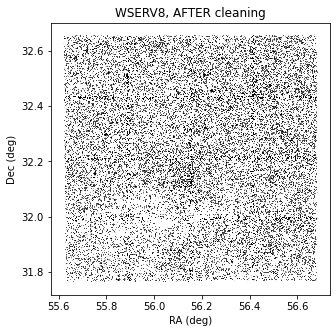

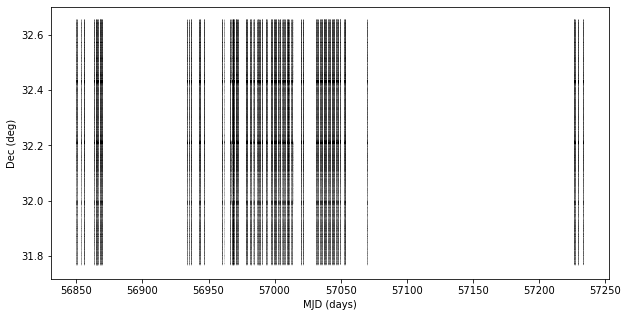

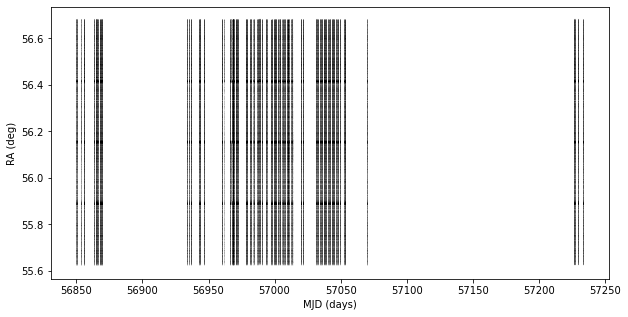

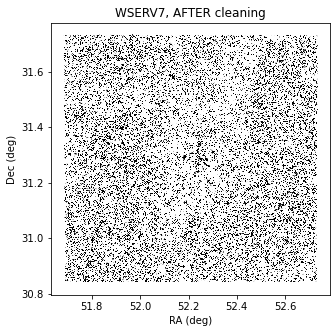

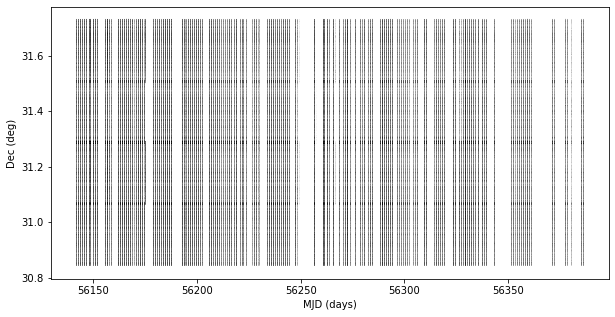

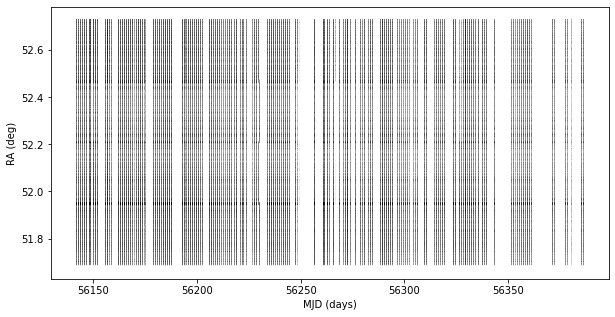

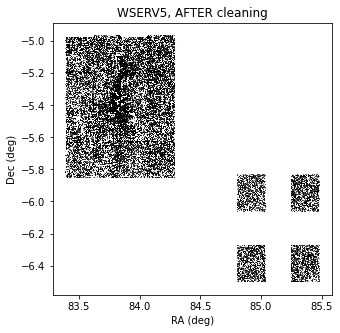

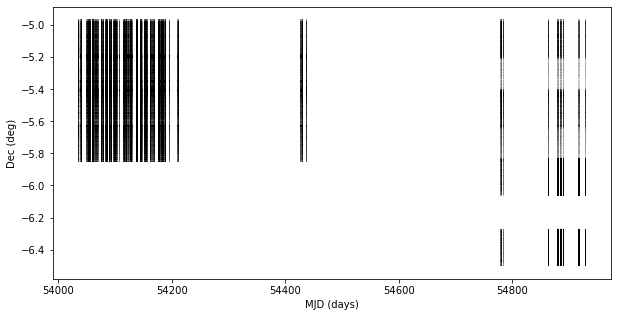

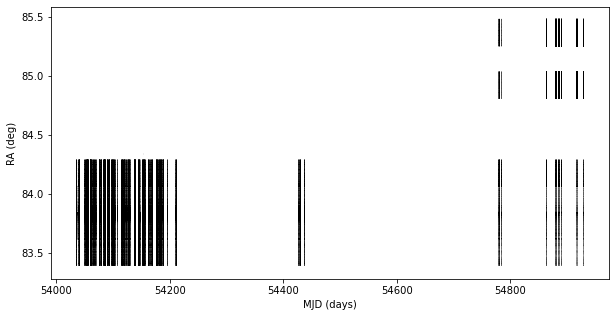

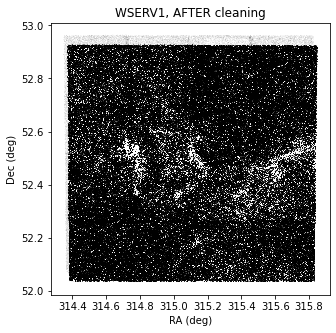

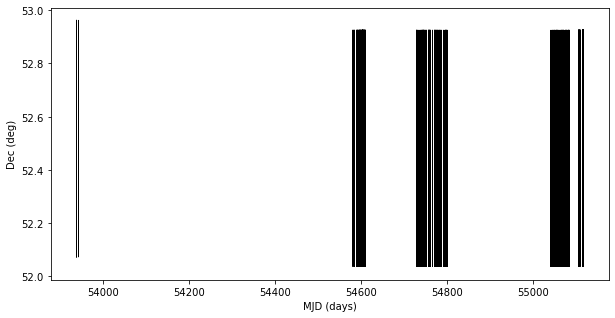

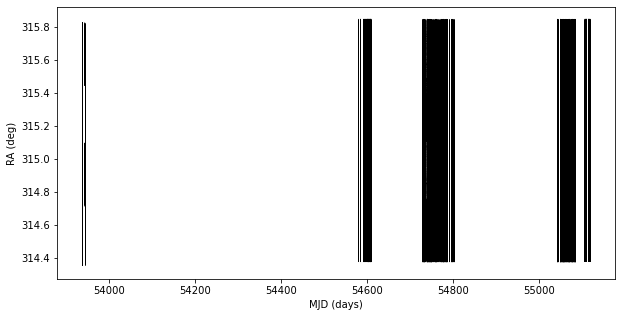

In [20]:
wserv_ids = [1, 5, 7, 8, 11]
clean_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/"
for wserv in wserv_ids[::-1]:

    clean_path = os.path.join(
        clean_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5.h5",
    )

    clean_dat = astropy.table.Table.read(clean_path)
    
    plt.figure(figsize=(5,5))
    
    plt.plot(np.degrees(clean_dat['RA']), np.degrees(clean_dat['DEC']), 'k,', alpha=0.01)
    plt.gca().invert_xaxis()
    plt.title(f"WSERV{str(wserv)}, AFTER cleaning")
    plt.xlabel("RA (deg)")
    plt.ylabel("Dec (deg)")
    
    plt.figure(figsize=(10,5))
    plt.plot(clean_dat['MEANMJDOBS'], np.degrees(clean_dat['DEC']), 'k,', alpha=0.01)
    plt.xlabel("MJD (days)")
    plt.ylabel("Dec (deg)")

    plt.figure(figsize=(10,5))
    plt.plot(clean_dat['MEANMJDOBS'], np.degrees(clean_dat['RA']), 'k,', alpha=0.01)
    plt.xlabel("MJD (days)")
    plt.ylabel("RA (deg)")

    

In [24]:
# Concept: 'pristine' sources.

q3 = (
    (ds["count"]["N_J"] > 50)
    & (ds["count"]["N_J"] < 150)
    & (ds["count"]["N_H"] > 50)
    & (ds["count"]["N_H"] < 150)
    & (ds["count"]["N_K"] > 50)
    & (ds["count"]["N_K"] < 150)
    & (ds["count"]["N_J_info"] + ds["count"]["N_J_warn"] + ds["count"]["N_J_severe"] == 0)
    & (ds["count"]["N_J_info"] + ds["count"]["N_J_warn"] + ds["count"]["N_J_severe"] == 0)
    & (ds["count"]["N_J_info"] + ds["count"]["N_J_warn"] + ds["count"]["N_J_severe"] == 0)
    & (ds["median"]["PSTAR"] > 0.75)
)

NameError: name 'ds' is not defined

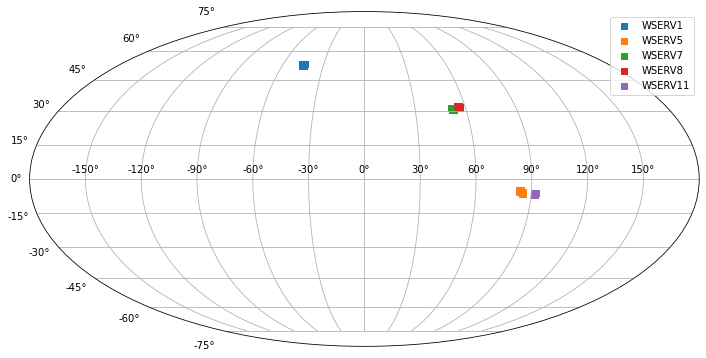

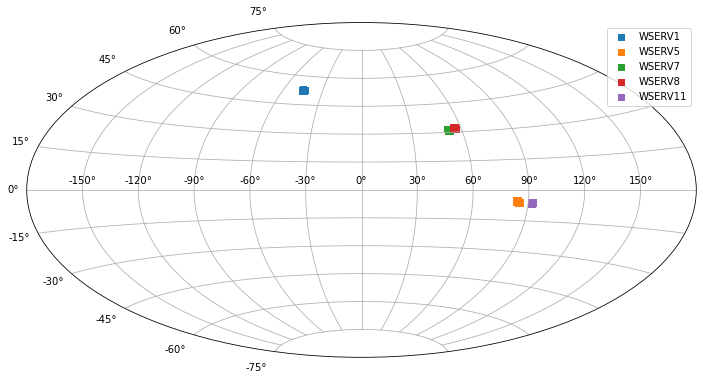

In [63]:
import astropy.coordinates as coord

wserv_ids = [1, 5, 7, 8, 11]
# wserv_ids = [5]

raw_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads"
output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

fig1 = plt.figure(figsize=(8*1.5,6*1.5))
ax1 = fig1.add_subplot(111, projection="mollweide")

fig2 = plt.figure(figsize=(8*1.5,6*1.5))
ax2 = fig2.add_subplot(111, projection="aitoff")

for wserv in wserv_ids:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    spread_raw_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_uncleaned_summary_spreadsheet.h5",
    )

    ds = pd.read_hdf(spread_raw_path, key='table')
    
    ra = coord.Angle(ds['median']['RA'].values*u.rad)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(ds['median']['DEC'].values*u.rad)
    
    ax1.scatter(ra.radian, dec.radian, marker=',', label=f'WSERV{wserv}')
    ax2.scatter(ra.radian, dec.radian, marker=',', label=f'WSERV{wserv}')
# ax1.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax1.grid(True)
ax1.legend()

# ax2.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax2.grid(True)
ax2.legend()

In [40]:
ds['median']['RA'].values

array([1.59981983, 1.59979792, 1.5997965 , ..., 1.60122909, 1.6012301 ,
       1.60242204])

In [44]:
ax.scatter?